# Importing the required libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd

# Importing the dataset

In [3]:
dataset=pd.read_csv('Admission_Predict.csv')

In [4]:
dataset.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.2 KB


In [6]:
dataset.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,115.614301,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,100.750000,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,200.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,300.250000,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,400.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


The correlation between the various columns are shown in this heatmap

<Axes: >

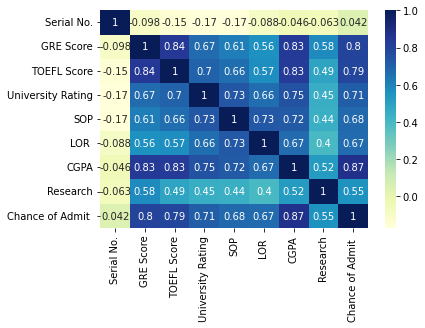

In [7]:
import seaborn as sb
sb.heatmap(dataset.corr(), cmap="YlGnBu", annot=True)

In [8]:
x = dataset.iloc[:, 1:-1].values
y = dataset.iloc[:, -1].values

In [9]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=0)

# Multiple Linear Regression

In [11]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train, y_train)
y_pred = regressor.predict(x_test)

Text(0.5, 1.0, 'Blue is true value and orange is predicted value')

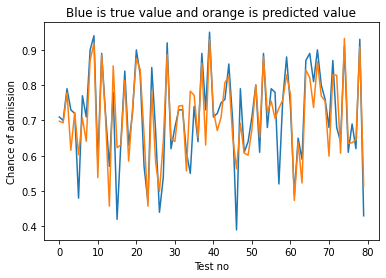

In [ ]:
plt.plot(list(range(0,80)),y_test)
plt.plot(list(range(0,80)),y_pred)
plt.xlabel('Test no')
plt.ylabel('Chance of admission')
plt.title('Blue is true value and orange is predicted value')

In [ ]:
from sklearn.metrics import mean_squared_error
print("The mean squared error for multiple linear regression is",mean_squared_error(y_test, y_pred))

The mean squared error for multiple linear regression is 0.004805156569785202


# Random Forest Regression

In [ ]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor()
regressor.fit(x_train, y_train)
rf = regressor.predict(x_test)

Text(0.5, 1.0, 'Blue is true value and orange is predicted value')

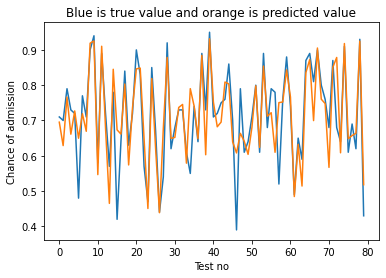

In [ ]:
plt.plot(list(range(0,80)),y_test)
plt.plot(list(range(0,80)),rf)
plt.xlabel('Test no')
plt.ylabel('Chance of admission')
plt.title('Blue is true value and orange is predicted value')

In [ ]:
print("The mean squared error for random forest regression is",mean_squared_error(y_test, rf))

The mean squared error for random forest regression is 0.006299084875000001


# Support Vector Regression

In [ ]:
from sklearn.svm import SVR
regressor=SVR(kernel='rbf')
regressor.fit(x_train,y_train)
svr=regressor.predict(x_test)

Text(0.5, 1.0, 'Blue is true value and orange is predicted value')

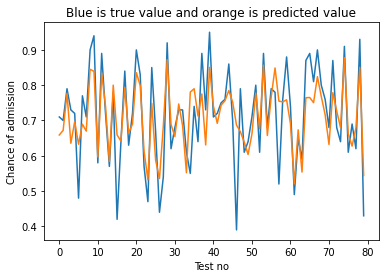

In [ ]:
plt.plot(list(range(0,80)),y_test)
plt.plot(list(range(0,80)),svr)
plt.xlabel('Test no')
plt.ylabel('Chance of admission')
plt.title('Blue is true value and orange is predicted value')

In [ ]:
print("The mean squared error for support vector regression is",mean_squared_error(y_test, svr))

The mean squared error for support vector regression is 0.007208649669839304


# KNN Regression

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
KNneigh = KNeighborsRegressor(n_neighbors=2)
KNneigh.fit(x_train,y_train)
knn= KNneigh.predict(x_test)

Text(0.5, 1.0, 'Blue is true value and orange is predicted value')

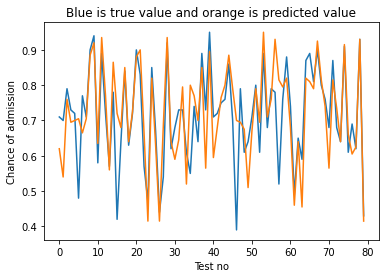

In [ ]:
plt.plot(list(range(0,80)),y_test)
plt.plot(list(range(0,80)),knn)
plt.xlabel('Test no')
plt.ylabel('Chance of admission')
plt.title('Blue is true value and orange is predicted value')

In [ ]:
print("The mean squared error for knn regression is",mean_squared_error(y_test, knn))

The mean squared error for knn regression is 0.00896


# Decision Tree Regressor

In [ ]:
from sklearn.tree import DecisionTreeRegressor
DTR = DecisionTreeRegressor() 
DTR.fit(x_train,y_train)
dectree= DTR.predict(x_test)

Text(0.5, 1.0, 'Blue is true value and orange is predicted value')

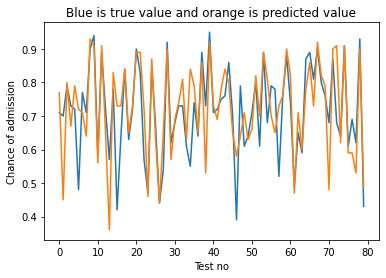

In [ ]:
plt.plot(list(range(0,80)),y_test)
plt.plot(list(range(0,80)),dectree)
plt.xlabel('Test no')
plt.ylabel('Chance of admission')
plt.title('Blue is true value and orange is predicted value')

In [ ]:
print("The mean squared error for decision tree regression is",mean_squared_error(y_test, dectree))

The mean squared error for decision tree regression is 0.010049999999999998


# Conclusion 

Among all the algorithms we have used the most appropriate is multiple linear regression because it gives us the least mean squared error.